## Problem Description

Mencoba menganalisis faktor yang dapat membedakan jenis zat dengan menggunakan fitur fourier dan gradien.

### Mengolah Dokumen

Impor data

In [326]:
import pandas as pd

directory = 'Data_crop1030/'

#Untuk zat A kita lakukan looping
for i in range (1,36):
    filename = f'_A_{i}_crop1030.csv'
    filepath = f'{directory}{filename}'

    try:
        globals()[f'da_{i}'] = pd.read_csv(filepath)
    except FileNotFoundError:
        print(f'File {filename} tidak ditemukan.')
    except pd.errors.EmptyDataError:
        print(f'File {filename} kosong.')

#untuk zat B kita lakukan looping
for i in range (1,36):
    filename = f'_B_{i}_crop1030.csv'
    filepath = f'{directory}{filename}'

    try:
        globals()[f'db_{i}'] = pd.read_csv(filepath)
    except FileNotFoundError:
        print(f'File {filename} tidak ditemukan.')
    except pd.errors.EmptyDataError:
        print(f'File {filename} kosong.')

Coba Plotting 4 sampel dari masing-masing zat A dan B

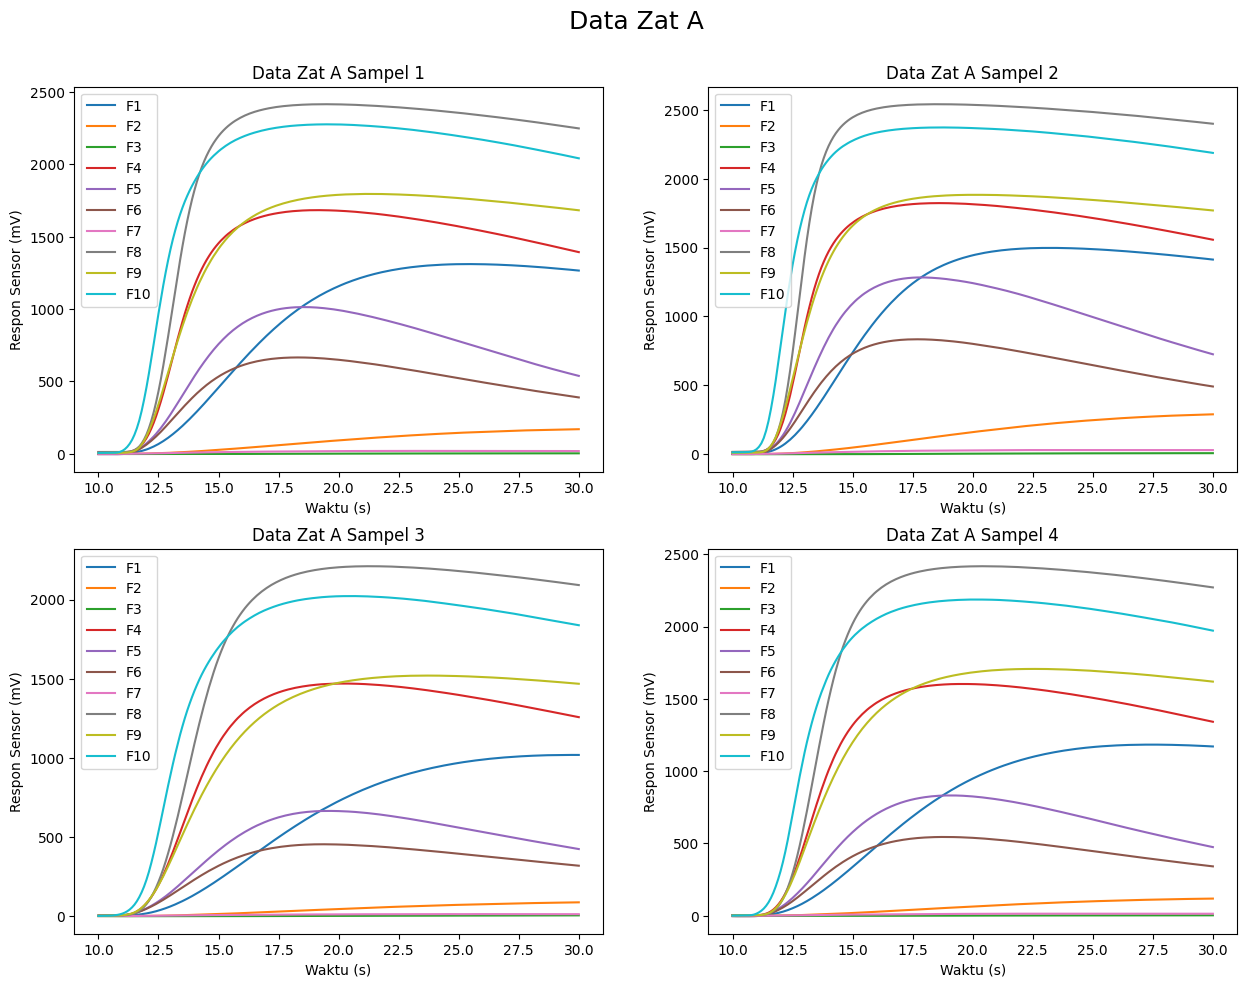

In [327]:
import matplotlib.pyplot as plt
da1 = da_1.drop(['time(s)'], axis = 1)
da2 = da_2.drop(['time(s)'], axis = 1)
da3 = da_3.drop(['time(s)'], axis = 1)
da4 = da_4.drop(['time(s)'], axis = 1)

dataframe1 = [da1, da2, da3, da4]
x = da_1['time(s)']

#kita plotting zat A
fig = plt.figure(figsize=(15, 11))
fig.suptitle('Data Zat A', y = 0.95, size = 18)

for i, df in enumerate(dataframe1, start = 1):
    plt.subplot(2,2,i)
    plt.plot(x, df)
    plt.title(f'Data Zat A Sampel {i}')
    plt.legend(df.columns)  
    plt.xlabel('Waktu (s)')
    plt.ylabel('Respon Sensor (mV)')


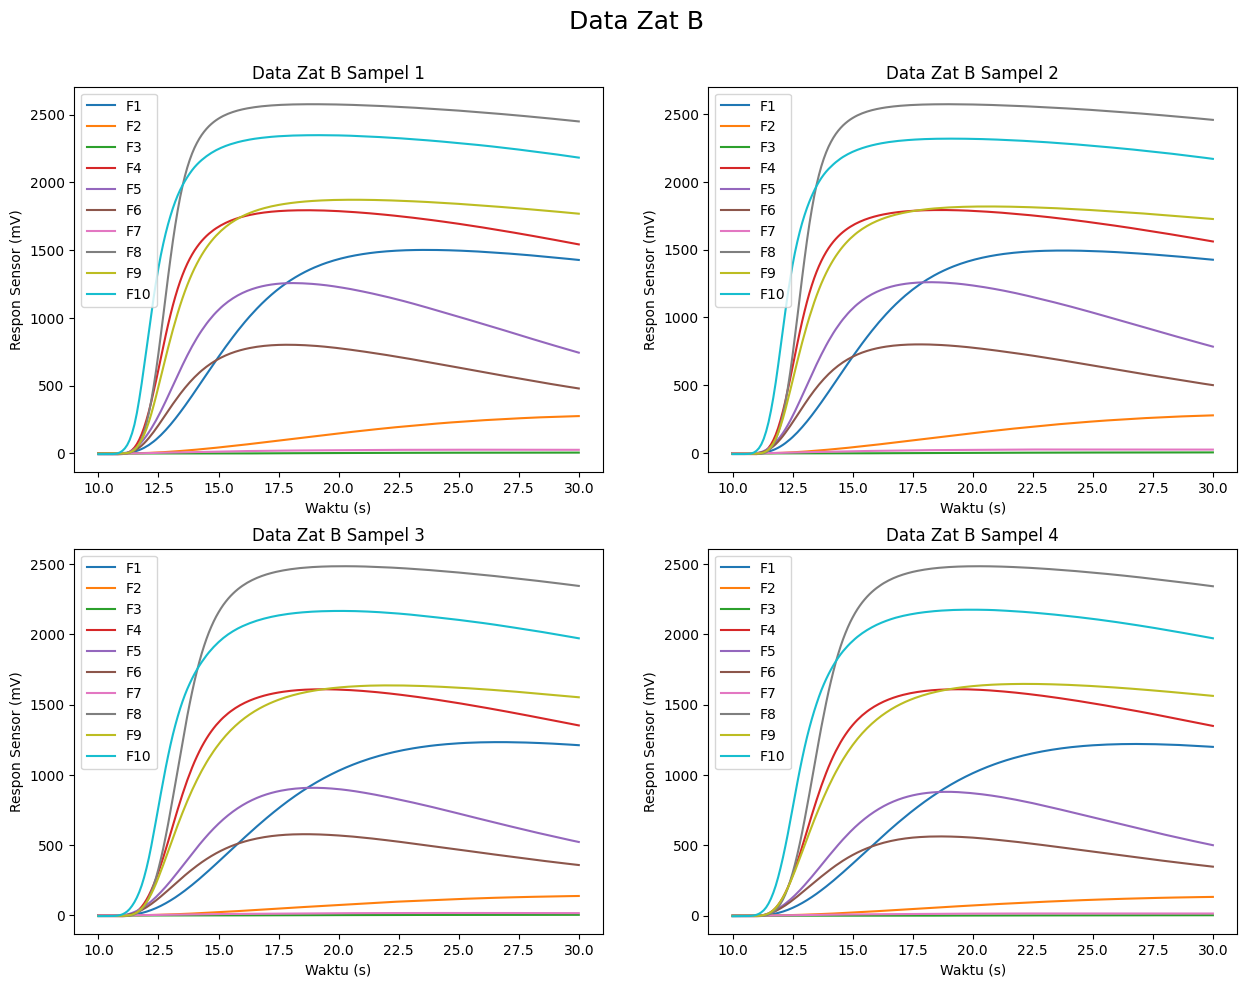

In [328]:
import matplotlib.pyplot as plt

db1 = db_1.drop(['time(s)'], axis = 1)
db2 = db_2.drop(['time(s)'], axis = 1)
db3 = db_3.drop(['time(s)'], axis = 1)
db4 = db_4.drop(['time(s)'], axis = 1)

dataframe2 = [db1, db2, db3, db4]
x2 = db_1['time(s)']

#kita plotting zat A
fig = plt.figure(figsize=(15, 11))
fig.suptitle('Data Zat B', y = 0.95, size = 18)

for i, df in enumerate(dataframe2, start = 1):
    plt.subplot(2,2,i)
    plt.plot(x2, df)
    plt.title(f'Data Zat B Sampel {i}')
    plt.legend(df.columns)  
    plt.xlabel('Waktu (s)')
    plt.ylabel('Respon Sensor (mV)')


### 1. Fitur Gradien Terbesar

<font color='#00FA9A'>a. Untuk setiap respon sensor hitunglah gradien terbesar (gradmax)</font>

In [329]:
#Kita coba cari gradien pada tiap sampe sensor A
import numpy as np

#cari nilai gradien maximum
x = da_1['time(s)']

#Buat variabel
variabel = []
for i in range (1, 36):
    variabel.append(f'da_{i}')

#Hitung gradien max
Hasil = []
for i in variabel:
    y = locals()[i]
    F = ['F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10']

    for j in F :
        gradient = np.gradient(y[j], x)
        idx_max = np.argmax(gradient)
        nilai_max = gradient[idx_max]
        waktu_max = y.at[y.index[idx_max], 'time(s)']
        
        dataframe = pd.DataFrame({
            'DataFrame': [i],
            'Kolom': [j],
            'Nilai Max Gradien': [nilai_max],
            'Pada Saat (s)': [waktu_max]
        })
    
        Hasil.append(dataframe)

final = pd.concat(Hasil, ignore_index=True)

# Mencetak hasil perhitungan untuk setiap DataFrame
for da in final['DataFrame'].unique():
    print(f"\nDataFrame: {da}")
    newda = final[final['DataFrame'] == da].drop(columns=['DataFrame'])
    print(newda)



DataFrame: da_1
  Kolom  Nilai Max Gradien  Pada Saat (s)
0    F1            190.000           15.3
1    F2             14.375           18.2
2    F3              1.250           18.7
3    F4            638.125           13.0
4    F5            270.625           13.5
5    F6            185.000           13.0
6    F7              4.375           12.9
7    F8           1073.750           13.1
8    F9            561.875           13.0
9   F10           1053.125           12.4

DataFrame: da_2
   Kolom  Nilai Max Gradien  Pada Saat (s)
10    F1            274.375           14.2
11    F2             23.750           18.8
12    F3              2.500           30.0
13    F4            840.625           12.7
14    F5            416.250           13.0
15    F6            271.875           12.9
16    F7              6.250           12.7
17    F8           1433.125           12.7
18    F9            710.000           12.6
19   F10           1261.250           12.0

DataFrame: da_3
   Kolom  Nila

In [330]:
#Kita coba cari gradien pada tiap sampe sensor B
import numpy as np

#cari nilai gradien maximum
x1 = db_1['time(s)']

#Buat variabel
variabels = []
for i in range (1, 36):
    variabels.append(f'db_{i}')

#Hitung gradien max
Jawab = []
for k in variabels:
    y1 = locals()[k]
    F = ['F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10']

    for j in F :
        gradient = np.gradient(y1[j], x1)
        idx_max1 = np.argmax(gradient)
        nilai_max1 = gradient[idx_max1]
        waktu_max1 = y1.at[y1.index[idx_max1], 'time(s)']
        
        dataframe = pd.DataFrame({
            'DataFrame': [k],
            'Kolom': [j],
            'Nilai Max Gradien': [nilai_max1],
            'Pada Saat (s)': [waktu_max1]
        })
    
        Jawab.append(dataframe)

final1 = pd.concat(Jawab, ignore_index=True)

# Mencetak hasil perhitungan untuk setiap DataFrame
for db in final1['DataFrame'].unique():
    print(f"\nDataFrame: {db}")
    newdb = final1[final1['DataFrame'] == db].drop(columns=['DataFrame'])
    print(newdb)



DataFrame: db_1
  Kolom  Nilai Max Gradien  Pada Saat (s)
0    F1            262.500           14.4
1    F2             22.500           18.6
2    F3              1.250           21.8
3    F4            841.250           12.5
4    F5            385.000           13.1
5    F6            263.125           12.8
6    F7              5.000           13.4
7    F8           1430.625           12.8
8    F9            719.375           12.6
9   F10           1289.375           12.1

DataFrame: db_2
   Kolom  Nilai Max Gradien  Pada Saat (s)
10    F1            261.875           14.5
11    F2             22.500           17.7
12    F3              1.250           18.9
13    F4            875.000           12.5
14    F5            392.500           13.1
15    F6            271.250           12.8
16    F7              5.625           12.4
17    F8           1459.375           12.8
18    F9            730.000           12.5
19   F10           1330.000           12.0

DataFrame: db_3
   Kolom  Nila

<font color='#00FA9A'>b. Simpan nilai gradmax tiap sampel pada tabel, kemudian beri label A atau B pada
kolom akhir sesuai jenis zat. Sehingga diperoleh tabel ukuran 70x11. Simpan data
dengan nama gradmax.csv (gradmax)</font>

In [331]:
#Kita coba cari gradien pada tiap sampe sensor A
import numpy as np

#cari nilai gradien maximum
x = da_1['time(s)']

#Buat variabel
variabel = []
for i in range (1, 36):
    variabel.append(f'da_{i}')

#Buat dataframe
column = [f"gradmax F{i}" for i in range(1, 11)]
column.append('label')
gradmax = pd.DataFrame(columns=column)

#Isi tabel
for i in variabel:
    y = locals()[i]
    F = ['F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10']

    max_value = []
    for j in F :
        gradient = np.gradient(y[j], x)
        nilai_max = gradient.max()
        max_value.append(nilai_max)
    
    max_value.append('A')

    gradmax_part = pd.DataFrame([max_value], columns=column)
    gradmax = pd.concat([gradmax, gradmax_part], ignore_index=True)

gradmax

C:\Users\muham\AppData\Local\Temp\ipykernel_7384\3455703430.py:31: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  gradmax = pd.concat([gradmax, gradmax_part], ignore_index=True)


,gradmax F1,gradmax F2,gradmax F3,gradmax F4,gradmax F5,gradmax F6,gradmax F7,gradmax F8,gradmax F9,gradmax F10,label
0,190.000,14.375,1.250,638.125,270.625,185.000,4.375,1073.750,561.875,1053.125,A
1,274.375,23.750,2.500,840.625,416.250,271.875,6.250,1433.125,710.000,1261.250,A
2,110.000,7.500,1.250,414.375,138.125,100.000,3.125,670.000,335.000,734.375,A
3,145.000,10.000,1.250,533.750,201.250,138.750,3.750,889.375,451.250,895.625,A
4,212.500,16.875,1.250,703.125,306.250,216.875,4.375,1177.500,579.375,1075.000,A
5,233.750,19.375,1.250,756.875,348.750,236.875,4.375,1311.250,645.625,1162.500,A
6,123.750,8.125,1.250,473.125,170.625,117.500,3.125,808.125,366.875,782.500,A
7,137.500,9.375,1.250,512.500,186.875,131.250,3.125,871.875,404.375,829.375,A
8,113.125,7.500,0.625,412.500,136.250,97.500,2.500,678.750,318.125,680.000,A
9,101.250,6.875,0.625,367.500,112.500,82.500,2.500,621.875,288.750,643.125,A


In [332]:
#Kita coba cari gradien pada tiap sampe sensor A
import numpy as np

#cari nilai gradien maximum
x1 = db_1['time(s)']

#Buat variabel
variabel1 = []
for i in range (1, 36):
    variabel1.append(f'db_{i}')

#Buat dataframe
column = [f"gradmax F{i}" for i in range(1, 11)]
column.append('label')
gradmax1 = pd.DataFrame(columns=column)

#Isi tabel
for i in variabel1:
    y = locals()[i]
    F = ['F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10']

    max_value = []
    for j in F :
        gradient = np.gradient(y[j], x1)
        nilai_max = gradient.max()
        max_value.append(nilai_max)
    
    max_value.append('B')

    gradmax_part = pd.DataFrame([max_value], columns=column)
    gradmax1 = pd.concat([gradmax1, gradmax_part], ignore_index=True)

gradmaxtotal = pd.concat([gradmax, gradmax1], ignore_index=True)
gradmaxtotal

C:\Users\muham\AppData\Local\Temp\ipykernel_7384\3454840860.py:31: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  gradmax1 = pd.concat([gradmax1, gradmax_part], ignore_index=True)


,gradmax F1,gradmax F2,gradmax F3,gradmax F4,gradmax F5,gradmax F6,gradmax F7,gradmax F8,gradmax F9,gradmax F10,label
0,190.000,14.375,1.250,638.125,270.625,185.000,4.375,1073.750,561.875,1053.125,A
1,274.375,23.750,2.500,840.625,416.250,271.875,6.250,1433.125,710.000,1261.250,A
2,110.000,7.500,1.250,414.375,138.125,100.000,3.125,670.000,335.000,734.375,A
3,145.000,10.000,1.250,533.750,201.250,138.750,3.750,889.375,451.250,895.625,A
4,212.500,16.875,1.250,703.125,306.250,216.875,4.375,1177.500,579.375,1075.000,A
...,...,...,...,...,...,...,...,...,...,...,...
65,184.375,14.375,1.250,579.375,241.875,160.000,4.375,1012.500,491.875,1100.625,B
66,233.750,20.000,1.250,750.625,323.750,210.625,3.750,1261.250,656.250,1297.500,B
67,220.000,19.375,0.625,659.375,303.125,196.250,3.750,1161.250,562.500,1175.000,B
68,232.500,21.250,1.250,766.250,323.125,220.000,6.250,1245.000,631.875,1258.125,B


simpan ke dalam gradmax.csv

In [333]:
gradmaxtotal.to_csv('gradmax.csv', index=False)

<font color='#00FA9A'>c. Analisis faktor yang dapat membedakan zat</font>

Menurut saya gradien maksimum dapat membedakan kedua jenis zat namun kurang bisa diandalkan. Hal ini dikarenakan gradien pada kedua zat bukanlah ciri identik dari zat tersebut karena bisa saja gradien maksimum berbeda disebabkan oleh perbedaan konsentrasi zat padahal sebenarnya kedua zat tersebut sama (dalam hal ini amplitudo akan mengalami perbedaan). Hal ini dapat ditunjukan dari grafik berikut :

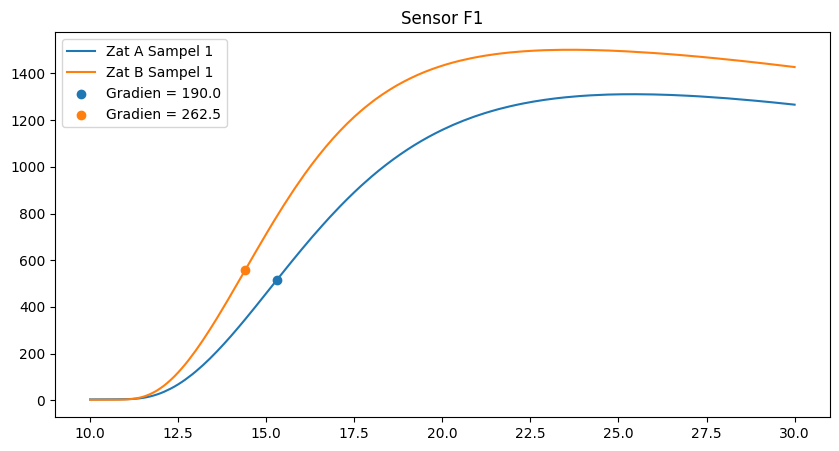

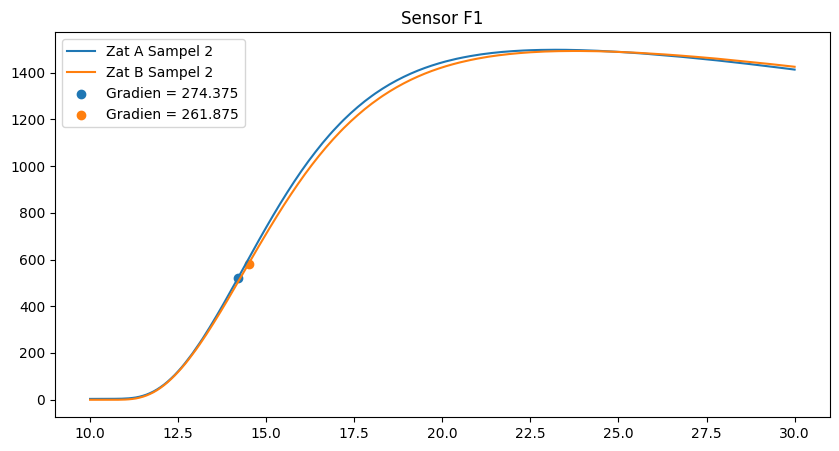

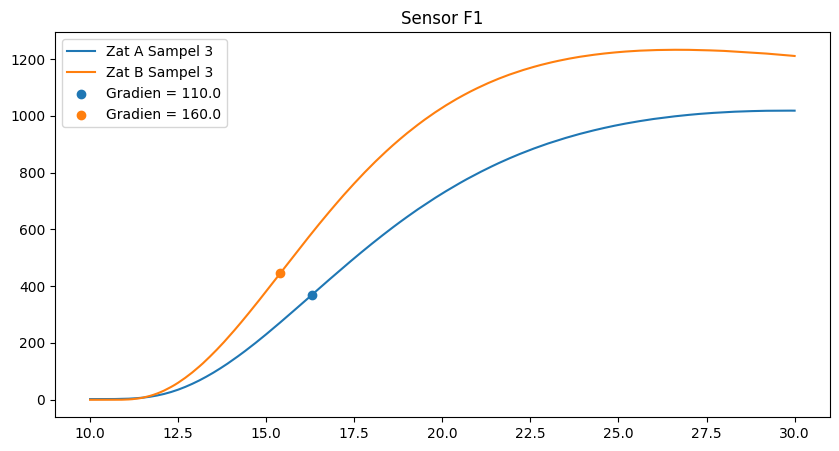

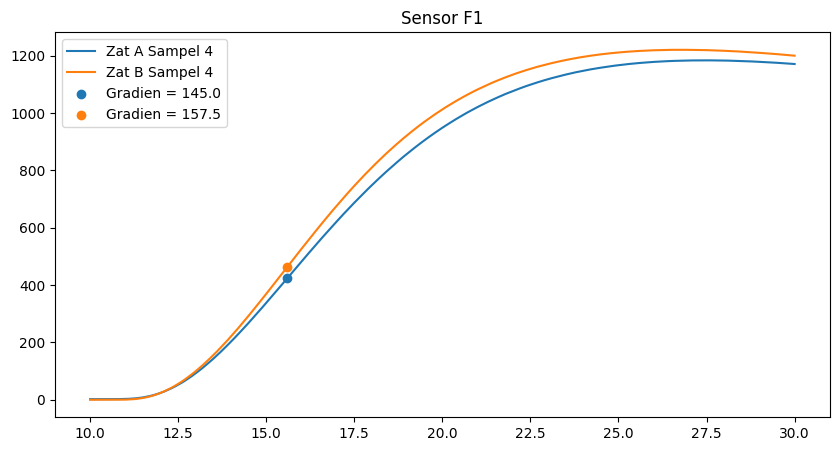

In [334]:
import numpy as np
import matplotlib.pyplot as plt

x = da_1['time(s)']
data_zata = [da_1, da_2, da_3, da_4]
data_zatb = [db_1, db_2, db_3, db_4]


for i in range (0, 4):
    zata = data_zata[i]
    zatb = data_zatb[i]
    gradmax_a = np.gradient(zata['F1'], x).max()
    idx_max1 = np.argmax(np.gradient(zata['F1'], x))
    waktu_max1 = zata.at[zata.index[idx_max1], 'time(s)']
    y_max1 = zata.at[zata.index[idx_max1], 'F1']

    gradmax_b = np.gradient(zatb['F1'], x).max()
    idx_max2 = np.argmax(np.gradient(zatb['F1'], x))
    waktu_max2 = zatb.at[zatb.index[idx_max2], 'time(s)']
    y_max2 = zatb.at[zatb.index[idx_max2], 'F1']
    
    plt.figure(figsize = (10, 5))

    # plt.subplot(121)
    plt.plot(x, zata['F1'], label = f'Zat A Sampel {i+1}')
    plt.plot(x, zatb['F1'], label = f'Zat B Sampel {i+1}')
    plt.scatter(waktu_max1, y_max1, label = f'Gradien = {round(gradmax_a, 3)}')
    plt.scatter(waktu_max2, y_max2, label = f'Gradien = {round(gradmax_b, 3)}')
    plt.title('Sensor F1')
    plt.legend()

Dari keempat plotting yang saya coba diatas, terlihat bahwa gradien maksimum tidak dapat mencerminkan atau membedakan jenis zat A atau B. Apabila mencerminkan kondizi zat kondisi gradien maksimum haruslah konsisten, disini terlihat bahwa ada kondisi dimana sampel zat A memiliki gradien lebih besar dibanding zat B begitu pun sebaliknya. Hal ini menandakan bahwa gradien tidak dapat diandalkan dalam membedakan jenis zat tetapi dapat digunakan walau harus memerhatikan beberapa faktor lainnya.

### 2. Fitur Koefisien Fourier Terbesar.

<font color='#00FA9A'>a. Menggunakan fourier</font>

In [335]:
#Kita coba cari fourier pada zat A
import numpy as np
from numpy.fft import fft, ifft, fftfreq

#cari nilai gradien maximum
x = da_1['time(s)']

#Buat variabel
variabel = []
for i in range (1, 36):
    variabel.append(f'da_{i}')

#Buat dataframe
column = [f"fouriermax F{i}" for i in range(1, 11)]
column.append('label')
fouriermax = pd.DataFrame(columns=column)

#Isi tabel
for i in variabel:
    y = locals()[i]
    F = ['F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10']

    max_value = []
    for j in F :
        fourier = fft(y[j])
        fourier = np.real(fourier)
        nilai_max = fourier.max()
        max_value.append(nilai_max)
    
    max_value.append('A')

    fourier_part = pd.DataFrame([max_value], columns=column)
    fouriermax = pd.concat([fouriermax, fourier_part], ignore_index=True)

fouriermax

C:\Users\muham\AppData\Local\Temp\ipykernel_7384\1463111006.py:33: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  fouriermax = pd.concat([fouriermax, fourier_part], ignore_index=True)


,fouriermax F1,fouriermax F2,fouriermax F3,fouriermax F4,fouriermax F5,fouriermax F6,fouriermax F7,fouriermax F8,fouriermax F9,fouriermax F10,label
0,178175.35875,17534.09250,245.96500,264519.42125,138130.86250,93853.65500,3053.29000,394237.11125,286222.61250,379202.58875,A
1,218205.71250,29858.76250,525.00875,295453.63750,181469.54000,119335.64500,4419.83375,426928.15875,309870.85375,407059.23875,A
2,121967.04625,8565.24125,268.03375,225436.69375,92383.98750,65976.83500,1785.26125,345048.98625,231518.93250,326922.77125,A
3,152126.28000,12160.40750,229.56625,249687.13250,114332.64625,77568.48000,2167.34875,385844.08125,265599.84750,358189.88750,A
4,194220.12125,21773.82000,476.01625,271165.40250,160060.40875,104486.57000,3344.17500,399829.45750,281382.70500,374693.16875,A
5,203997.77375,24664.38875,480.28875,280037.04625,167519.83500,108311.88500,3643.42375,416130.02875,289932.02250,383075.37625,A
6,136596.58250,10535.87250,192.20375,237415.11875,102951.32250,69092.62125,1988.02375,381377.28500,236876.83750,337934.22750,A
7,145030.25875,11858.30125,270.79375,242113.20375,106954.63250,71853.56125,2109.85750,385658.24500,247955.88875,344994.49375,A
8,128035.01000,8503.38875,202.84375,227961.42250,91595.81875,64626.61125,1652.92625,363163.58875,222223.68250,322745.48000,A
9,117922.72125,7770.85375,365.89625,219634.65000,81537.58125,58543.87750,1507.08125,357126.96375,217456.69500,316841.99750,A


In [336]:
#Kita coba cari fourier pada zat A
import numpy as np
from numpy.fft import fft, ifft, fftfreq

#cari nilai gradien maximum
x1 = da_1['time(s)']

#Buat variabel
variabel1 = []
for i in range (1, 36):
    variabel1.append(f'db_{i}')

#Buat dataframe
column = [f"fouriermax F{i}" for i in range(1, 11)]
column.append('label')
fouriermax1 = pd.DataFrame(columns=column)

#Isi tabel
for i in variabel1:
    y = locals()[i]
    F = ['F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10']

    max_value = []
    for j in F :
        fourier = fft(y[j])
        fourier = np.real(fourier)
        nilai_max = fourier.max()
        max_value.append(nilai_max)
    
    max_value.append('B')

    fourier_part = pd.DataFrame([max_value], columns=column)
    fouriermax1 = pd.concat([fouriermax1, fourier_part], ignore_index=True)

fouriermaxtotal = pd.concat([fouriermax, fouriermax1], ignore_index=True)
fouriermaxtotal

C:\Users\muham\AppData\Local\Temp\ipykernel_7384\4137572810.py:33: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  fouriermax1 = pd.concat([fouriermax1, fourier_part], ignore_index=True)


,fouriermax F1,fouriermax F2,fouriermax F3,fouriermax F4,fouriermax F5,fouriermax F6,fouriermax F7,fouriermax F8,fouriermax F9,fouriermax F10,label
0,178175.35875,17534.09250,245.96500,264519.42125,138130.86250,93853.65500,3053.29000,394237.11125,286222.61250,379202.58875,A
1,218205.71250,29858.76250,525.00875,295453.63750,181469.54000,119335.64500,4419.83375,426928.15875,309870.85375,407059.23875,A
2,121967.04625,8565.24125,268.03375,225436.69375,92383.98750,65976.83500,1785.26125,345048.98625,231518.93250,326922.77125,A
3,152126.28000,12160.40750,229.56625,249687.13250,114332.64625,77568.48000,2167.34875,385844.08125,265599.84750,358189.88750,A
4,194220.12125,21773.82000,476.01625,271165.40250,160060.40875,104486.57000,3344.17500,399829.45750,281382.70500,374693.16875,A
...,...,...,...,...,...,...,...,...,...,...,...
65,180673.39125,17999.31875,430.55625,261986.76000,141973.67000,88574.12875,2032.10000,406189.21375,270867.02500,380756.53500,B
66,207409.01625,26045.56875,643.99125,287104.40500,173256.26375,107386.72250,2038.96250,426415.25000,295451.24750,400371.67625,B
67,199464.88125,24233.87750,501.84375,269990.99250,167053.70250,105470.18250,2183.60375,408965.07125,278000.59750,385463.89375,B
68,207922.19875,27055.96500,622.86625,289632.71500,180980.31000,115766.44000,4298.31375,423210.44125,290233.48375,400907.73375,B


In [337]:
fouriermaxtotal.to_csv('fouriermax.csv', index=False)

<font color='#00FA9A'>b. Analisis faktor fourier sebagai pembeda kedua zat</font>

Menurut saya koefisien fourier maximum (fouriermax) dapat membedakan zat a dan b dengan lebih identik. Hal ini karena koefisien fourier merupakan identitas dari suatu bentuk grafik karena tentunya gelombang penyusun setiap grafik berbeda dan bila suatu zat yang sama dibagi menjadi beberapa sampel seharusnya memiliki koefisien fourier yang konstan besarnya. Akan saya coba plotting beberapa data untuk melihat bentuk lebih jelas.

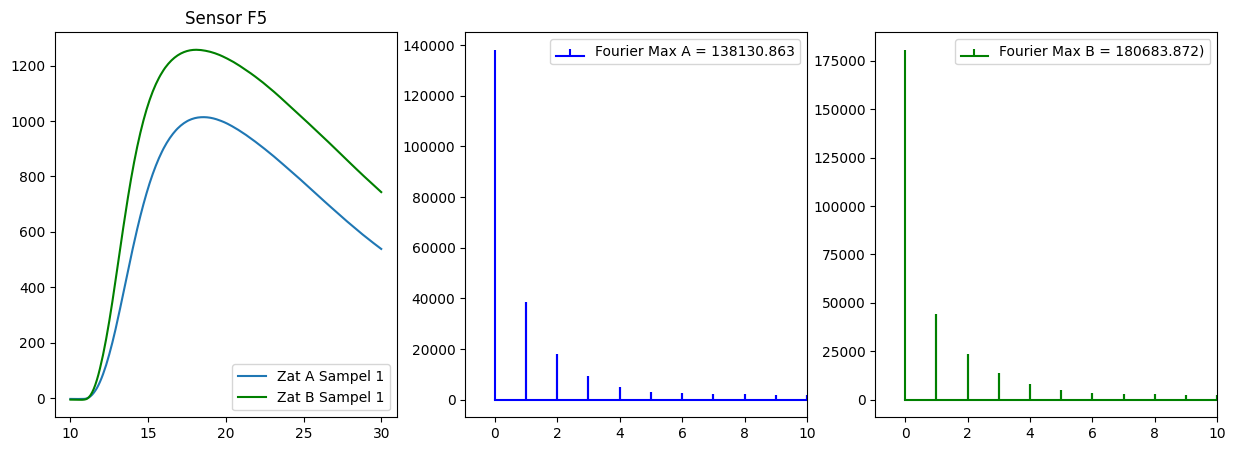

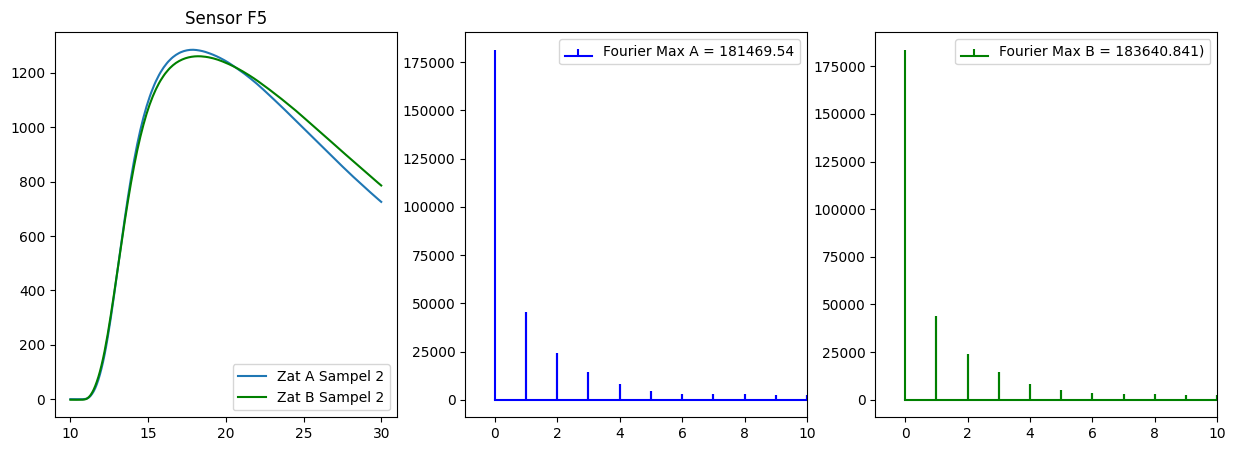

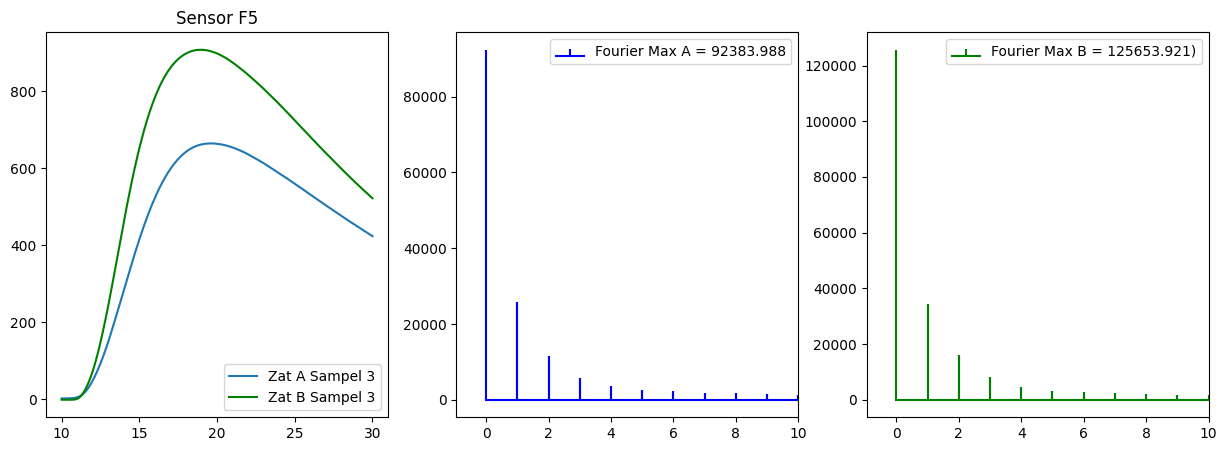

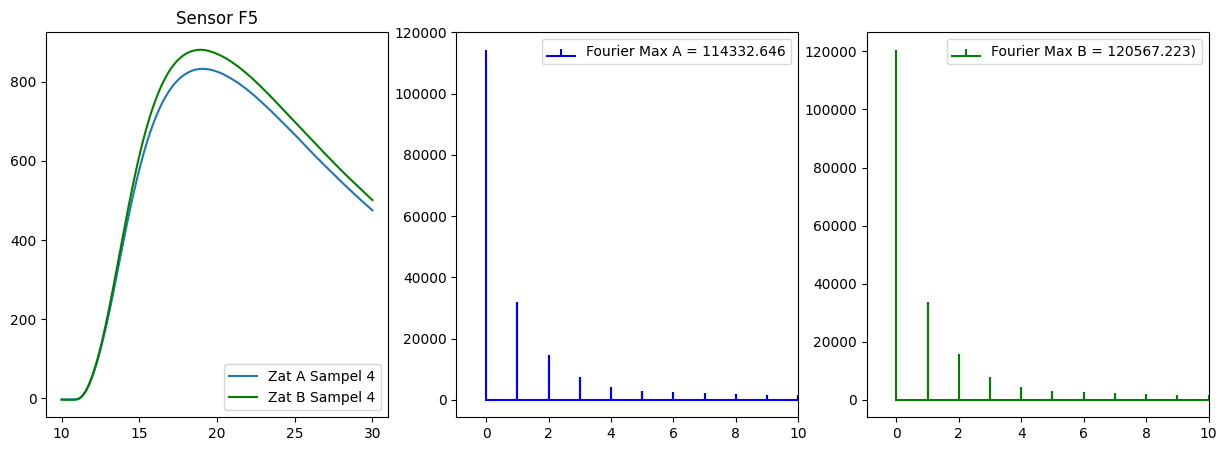

In [371]:
import numpy as np
from numpy.fft import fft, ifft, fftfreq

x = da_1['time(s)']
data_zata = [da_1, da_2, da_3, da_4]
data_zatb = [db_1, db_2, db_3, db_4]


for i in range (0, 4):
    zata = data_zata[i]
    zatb = data_zatb[i]

    ya = zata['F5']
    yb = zatb['F5']

    yafourier = fft(ya)
    ybfourier = fft(yb)
    yamax = np.real(yafourier.max())
    ybmax = np.real(ybfourier.max())

    freqa = fftfreq(len(yafourier), d = 1/len(x))
    freqb = fftfreq(len(ybfourier), d = 1/len(x))

    plt.figure(figsize = (15,5))

    plt.subplot(1,3,1)
    plt.plot(x, zata['F5'], label = f'Zat A Sampel {i+1}')
    plt.plot(x, zatb['F5'], label = f'Zat B Sampel {i+1}', c = 'g')
    plt.title('Sensor F5')
    plt.legend()

    plt.subplot(1,3,2)
    plt.stem(abs(freqa), abs(yafourier), 'b', \
         markerfmt=" ", basefmt="-b", label = f'Fourier Max A = {round(yamax, 3)}')
    plt.xlim(-0.95, 10)
    plt.legend()

    plt.subplot(1,3,3)
    plt.stem(abs(freqb), abs(ybfourier), 'g', \
         markerfmt=" ", basefmt="-g" ,label = f'Fourier Max B = {round(ybmax, 3)})')
    plt.xlim(-0.95, 10)
    plt.legend()

Diatas saya mencari contoh lain yaitu pada sensor F5, terlihat bahwa koefisien fourier max (fouriermax) zat B selalu lebih besar dan konstan, hal ini menunjukan bahwa koefisien fourier dapat digunakan untuk membedakan dua jenis zat karena koefisien fourier tiap zat adalah identik. Maka untuk kedua zat dapat disimpulkan apabila ditemukan koefisien fourier zat satu lebih besar dari zat lainnya maka itu adalah zat B.